# Medium Article EinSum 101

In [22]:
import numpy as np
# Needed for plotting
import matplotlib.pyplot as plt

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Define the seed so that results can be reproduced
seed = 11

# Generate synthetic data for the Article Einstein sumation

In [23]:
nxt=20; mxt=10000;
x,y=dt.make_regression(n_samples=mxt,
                         n_features=nxt,
                         noise=1.,
                         random_state=seed)

In [24]:
print(x[:5])

[[ 0.70337691  0.2969772  -0.78225739  0.17799388  0.79800857 -0.23823717
  -2.23584554  0.12770769 -2.62683357  1.61649632 -0.17925845 -0.20374913
   0.40714217  0.4300291  -0.86256594 -0.93513788  1.491888   -0.80705578
  -1.47636098  0.2025032 ]
 [ 0.46297083  0.7633453   1.83827058  0.08042244 -1.24589307  1.29201206
  -1.20765005  0.09046335 -2.23122465  0.70743713  0.27973486  1.08770228
  -0.79272106  0.1253807   0.30836571 -1.66582064  0.13295684 -2.01710836
  -0.3495766   0.43982148]
 [ 0.69465318 -0.30947095  2.0955184  -0.1740145   0.46141935 -0.68217633
  -0.28336858  0.44160374  1.03420176 -0.22729636 -0.88705069  0.99080446
   0.4426358  -0.25869569 -0.55067707 -0.92172586 -0.07936935 -0.15204604
  -0.53820162 -0.1586966 ]
 [ 1.21037668  0.54382535 -1.04028118  1.21234078 -0.33732755 -1.05652187
   0.5473492  -0.44086037  0.59071511  0.29256046  0.21599549  0.15820267
  -0.62156586  0.77652336  0.88397169  0.5715961   0.00892571  0.09668563
  -1.83566924 -0.17212756]
 [-0

In [25]:
print(y[:5])

[ -32.05307591  -97.89781786   57.19105773  163.73831492 -264.61844731]


In [26]:
def sigmoid(z):
    s = 1./(1.+np.exp(-z))
    return s

In [27]:
def cost_Class(X, Y, w, b, lr):
    # FORWARD PROPAGATION (FROM X TO COST)
    _,m = X.shape
    # compute activation
    hypotesis = np.dot(w.T,X)+b
    A = sigmoid(hypotesis)
    # loss
    loss=(Y*np.log(A)+(1.-Y)*np.log(1.-A))
    gradient = np.sum(np.dot(loss, X.T), axis=1)/m
    w = w - lr*gradient
    # compute cost
    cost1 = -1/m * np.sum(loss, axis=1)     #
    return cost1,w

In [28]:
nap1=1; map1=mxt;
nya=2; mya=nap1;
mba=1;
np.random.seed(seed)

In [29]:
w, b = np.random.randn(nxt,mba), np.random.randn(mba,mxt)
xT=np.transpose(x)
yT=np.transpose(y)
print(w.shape,x.shape)
cost_Class(xT, yT, w, b, 0.001)

(20, 1) (10000, 20)


(array([-72.06270094]),
 array([[ 1.90437067],
        [-0.13115706],
        [-0.3296492 ],
        [-2.49840263],
        [ 0.1466313 ],
        [-0.16471543],
        [-0.38171343],
        [ 0.4703186 ],
        [ 0.57596665],
        [-0.91068705],
        [-0.73132374],
        [-0.32081756],
        [ 0.84459824],
        [ 0.71610811],
        [-1.15063258],
        [-0.96455933],
        [ 0.89175332],
        [ 1.72955001],
        [ 0.12384084],
        [-0.52853069]]))

In [30]:
Jx=cost_Class(xT, yT, w, b, 0.001)
# -1/m*  np.sum((  Y  *   np.log(A)  +  (1.-Y)     *       np.log(1.-A))          ,    axis=1)
#        A^Y             +             (1-A)^(1-Y)
# -- Entropy:   - q ln(p) - p ln(q)
# -- Coming from ..  - P = -  (p^q * q^p)
print ("Cost = " + str(Jx))

Cost = (array([-72.06270094]), array([[ 1.90437067],
       [-0.13115706],
       [-0.3296492 ],
       [-2.49840263],
       [ 0.1466313 ],
       [-0.16471543],
       [-0.38171343],
       [ 0.4703186 ],
       [ 0.57596665],
       [-0.91068705],
       [-0.73132374],
       [-0.32081756],
       [ 0.84459824],
       [ 0.71610811],
       [-1.15063258],
       [-0.96455933],
       [ 0.89175332],
       [ 1.72955001],
       [ 0.12384084],
       [-0.52853069]]))


# Using EinsteinSum

In [31]:
def cost_Ein(X, Y, w , b, lr):
    # Forward propagation (from x to J)
    _,m = X.shape
    #print(X.shape)
    # We can transpose simply changing ij by ji ..
    hypothesis = np.einsum('ji,jk->ik',w,X)+b
    # compute activation
    A = sigmoid(hypothesis)
    #print(A)
    # loss
    loss=(Y*np.log(A)+(1.-Y)*np.log(1.-A))
    #print(loss)
    gradient = np.einsum('ij, ij -> ', loss, X)/m
    #print(gradient)
    w = w - lr*gradient
    # compute cost
    cost1 = -1/m  *  np.einsum('ij->',loss)     #
    return cost1, w

In [32]:
# -- Einstein Sum:
def opt_Ein(X, Y, w, b, lr, epochs):
    _,m = X.shape
    #print(X.shape)
    errors = np.zeros(epochs)
    for i in range(epochs):
        errors[i], upd_w = cost_Ein(X, Y, w, b, lr)
        w = upd_w
    return w, errors

In [33]:
## -- Classical:
def opt_Class(X, Y, w, b, lr, epochs):
    _,m = X.shape
    errors = np.zeros(epochs)
    for i in range(epochs):
        errors[i], upd_w = cost_Class(X, Y, w, b, lr)
        w = upd_w
    return w, errors

In [34]:
%timeit cost_Ein(xT, yT, w, b, 0.001)

488 µs ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%timeit cost_Class(xT, yT, w, b, 0.001)

426 µs ± 84.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
Jx_Ein=cost_Ein(xT, yT, w, b, 0.001)
print ("Cost = " + str(Jx_Ein))

Cost = (-72.06270094408943, array([[ 1.90437067],
       [-0.13115706],
       [-0.3296492 ],
       [-2.49840263],
       [ 0.1466313 ],
       [-0.16471543],
       [-0.38171343],
       [ 0.4703186 ],
       [ 0.57596665],
       [-0.91068705],
       [-0.73132374],
       [-0.32081756],
       [ 0.84459824],
       [ 0.71610811],
       [-1.15063258],
       [-0.96455933],
       [ 0.89175332],
       [ 1.72955001],
       [ 0.12384084],
       [-0.52853069]]))


In [37]:
Jx_Class=cost_Class(xT, yT, w, b, 0.001)
print ("Cost = " + str(Jx_Class))

Cost = (array([-72.06270094]), array([[ 1.90437067],
       [-0.13115706],
       [-0.3296492 ],
       [-2.49840263],
       [ 0.1466313 ],
       [-0.16471543],
       [-0.38171343],
       [ 0.4703186 ],
       [ 0.57596665],
       [-0.91068705],
       [-0.73132374],
       [-0.32081756],
       [ 0.84459824],
       [ 0.71610811],
       [-1.15063258],
       [-0.96455933],
       [ 0.89175332],
       [ 1.72955001],
       [ 0.12384084],
       [-0.52853069]]))


In [38]:
%timeit opt_Ein(xT, yT, w, b, 0.001, 1000)

582 ms ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit opt_Class(xT, yT, w, b, 0.001, 1000)

445 ms ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
#### -----
def putStyle(sFont,syT,top1,R1):
    import matplotlib as mpl
    import matplotlib.style as style
    style.available

    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = sFont
    mpl.rcParams['axes.linewidth'] = 4
    mpl.rcParams['axes.spines.bottom'] = top1
    mpl.rcParams['axes.spines.right'] = R1
    mpl.rcParams['xtick.major.size'] = 10
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 10
    mpl.rcParams['ytick.major.width'] = syT
    mpl.rcParams['lines.linewidth']= 3
    mpl.rcParams["figure.figsize"] = (8,8)

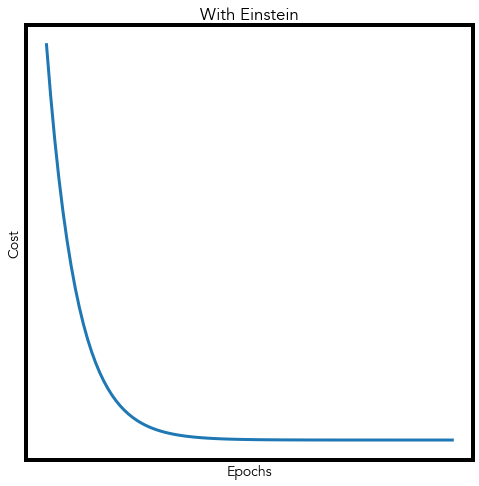

In [49]:
## --- Style --
putStyle(14,2,True,True)

thetasEin, errorsEin = opt_Ein(xT, yT, w, b, lr=0.001, epochs=100)
plt.plot(errorsEin)
plt.title('With Einstein')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
#plt.savefig('plot_Ein_v2.png')

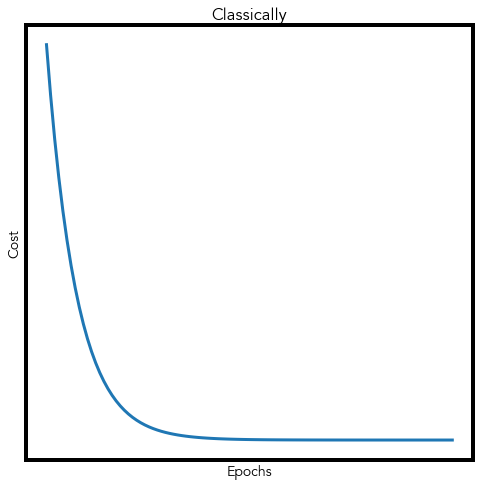

In [51]:
## --- Style --
putStyle(14,2,True,True)

thetasClass, errorsClass = opt_Class(xT, yT, w, b, lr=0.001, epochs=100)
plt.plot(errorsClass)
plt.title('Classically')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
#plt.savefig('plot_Class_v2.png')